# **Task D1**
## Analyzing YouTube Video Data from News Publishers

##### This task focuses on analyzing YouTube videos about a news topic (e.g., Covid-19) published by at least 4 English news publishers (e.g., BBC, Fox News, ...) from a start date to an end date. You will need to specify the news topic and the list of keywords to search for the videos about that topic on YouTube. Also, you will need to extract the channel IDs of the news publishers using the function get_channel_info() given to you in the attached "collect.ipynb" file. All settings need to be specified in Section B (Settings) of "collect.ipynb" and also copied into Section B (Settings) of this jupyter notebook (D1.ipynb). Please note the terms "News Publisher" and "Channel" have been used interchangeably in this task (each news publisher has a channel - if a news publisher has more than one channels on YouTube, pick any and state that in your TaskCompletionReport). The following instructions convey important information about the task. Please **read them carefully** and complete the task. If you need any clarification please    
<img src="youtube.png" alt="SIT112 Avocado!" width="1800" height="200">

### A. Instructions
#### Attachments
* directions.pdf
* collect.ipynb
* credentials-sample.ini
* video-presentation-guideline.pdf

#### Get Started 
1. Rename the "credentials-sample.ini" file to "credentials.ini" and follow the instructions. 
2. Creat your YouTube API key and assign it to developer_key in the credentials.ini file. You will need the YouTube API key to get access to the YouTube API (collect the data). See the following video: https://youtu.be/N18czV5tj5o (the video is not up to date; the instrucitons might be sighly different. You can view the following link for more details: https://developers.google.com/youtube/v3/getting-started). Please note Projects that enable the YouTube Data API have a default quota allocation of 10,000 units per day; to make an efficient use of your quota, please avoid multiple excecutions of the "collect.ipynb" file: https://developers.google.com/youtube/v3/guides/quota_and_compliance_audits. 
3. To work with the YouTube API (send queries), you need to install Google API Python Client using: "conda install google-api-python-client" 
#### Specify the news topic and news publishers (channels)
4. Choose a news topic (e.g., Covid-19) and a list of keywords to be used for finding videos about that topic. You can extract the keywords by looking at some sample video titles. 
5. Choose at least 4 popular English news publishers (e.g., BBC, Fox News).
6. Extract, manually, the video IDs of sample videos from different  news publishers (channels). You can do so by clicking on the share button for each video. 
7. Extract the Channel IDs of the videos using the get_channel_info() function in collect.ipynb 
#### Collect the Videos and Comments using "collect.ipynb" 
8. Specify the Channel IDs and names in the Settings section of the attached "collect.ipynb" file (CHANNELS = {...})
9. Specify the list keywords in the Settings section of the attached collect.ipynb file (KEYWORDS = [...])
10. Specify the START_DATE and END_DATE in the Settings section of the attached collect.ipynb file
11. Specify the MAX_VIDEOS such that you can extract **at least 20 videos per news publisher (channel)**. Make sure for your specified topic, **at least 300 comments per news publisher (channel)** can be collected. Please note some publishers might have disabled comments.
12. Please **do not make any changes to the "collect.ipynb" file**
13. Execute the collect.ipynb file to collect the videos (will be stored in videos.csv) and the comments on those videos (will be stored in comments.csv).
#### Complete the Task
14. <font color='red'> Choose only 2 quesitons from Section E1 and only 1 quesiton from Section E2 </font> and answer them based on the hints. Please note, for each question, you must **briefly discuss your observations** based on the results.
15. Please note **there is no unique solution** for most questions; if you need to make any assumptions, **state your assumptions** in the comments and in your TaskCompletionReport and answer the question accordingly. Please also note, **if something has not been clearly stated in a question (e.g., the type of visualization, etc) it means you are allowed to make your own choice**. 
16. **Read the attached "video-presentation-guideline.pdf"** carefully and record a video clip (based on video-presentation-guideline.pdf) that presents your completed task. Upload the video on a video repository such as YouTube (or any other preferred repository) and provide the link in the TaskCompletionReport. 
17. Complete the TaskCompletionReport form.

#### Submit the Task
18. Please make sure you have copied the settings from collect.ipynb into your solution file (D1.ipynb), under section B (settings).  
19. Please make sure you have executed and saved all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
20. Please make sure you have included the link to the video recording of your presentation in your TaskCompletionReport. 
21. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution file (D1.ipynb) as an "ipynb" file (do not zip/combine them). Please do not include "collect.ipynb" in your submission. 

Good luck :)

### B. Settings
Copy your settings from Section B of the "collect.ipynb" file below. 

In [16]:
# === B. SETTINGS ===
from datetime import datetime

VIDEOS_FILE = "videos.csv"
COMMENTS_FILE = "comments.csv"
CREDENTIALS_FILE = 'credentials.ini'
START_DATE = datetime(2020, 1, 1)
END_DATE = datetime(2023, 1, 1)
KEYWORDS =['coronavirus', 'covid', 'covid-19', 'pandemic']
# You can use functin get_channel_info() to extract the channel ID of a sample video from a news publisher ...
CHANNELS = {
    'UCXIJgqnII2ZOINSWNOGFThA' : 'Fox News',
    'UC16niRr50-MSBwiO3YDb3RA' : 'BBC News',
    'UCupvZG-5ko_eiXAupbDfxWw' : 'CNN',
    'UCaXkIU1QidjPwiAYu6GcHjg' : 'MSNBC'
}
MAX_VIDEOS = 50 # the maximum number of video that should be returned for each request. Acceptable values are 0 to 50
QUERY= f"intitle:{','.join(KEYWORDS)}"

### C. Imports
You need to import the following libraries. Install the libraries using "conda install ... or pip install ..." if they have not been installed on your machine. For example you can install google api python client by executing "conda install google-api-python-client"

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from datetime import datetime
import os
from configparser import ConfigParser
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from langdetect import detect
import langdetect
from textblob import TextBlob
import calendar
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from prettytable import PrettyTable
from tabulate import tabulate
import numpy as np
from collections import defaultdict
import warnings
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juanbernal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### D. Clean and Prepare the Data

In [17]:
# Load collected video metadata
videos_df = pd.read_csv("videos.csv")

# Load collected comments
comments_df = pd.read_csv("comments.csv", encoding='utf-8', on_bad_lines='skip', engine='python')
# Preview data
videos_df.head(5)
comments_df.head(5)

# # Basic info
# print(videos_df.info())
# print(comments_df.info())


,video_id,comment_id,comment_text,comment_author,comment_date,comment_like_count,parent_comment_id
0,d1eEWihvwpQ,UgzZ6fvV9JGsvh0159p4AaABAg,hello 5 years later,@Bobherry,2025-03-10T23:40:26Z,0.0,NaN
1,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,Permanently messed up my sense of time,@radioactivebeverage,2024-03-15T01:47:38Z,2.0,NaN
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,I had COVID-19 in August and it was Super Unpl...,@rosieasmrwhispererzephier7021,2022-10-11T02:46:38Z,0.0,NaN
3,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,@@showline8303much better I also had Influenza...,@rosieasmrwhispererzephier7021,2023-11-11T02:21:41Z,0.0,UgxbTG_0cWGvMAee0sx4AaABAg
4,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,"This happened on March 26, 2020. That is when...",@danhobson24,2022-06-08T21:53:44Z,0.0,NaN


##### D.1. Write Python code that cleans the data for analyzing the videos and comments.

In [18]:
# a basic data cleaning has been performed on the collected data by the clean_data()function in collect.ipynb
# additionl data cleaning can be added here - if needed  
def remove_text(text):
    #removing @mentions from the text column
    text = re.sub(r"@\w+", "", text)

    #removing #s from the text
    text = re.sub(r"#", "", text)

    #remove retweet indicator "RT"
    text = re.sub(r"RT", "", text)
    
    #remove URLS
    text = re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "", text)
    
    #remove puntuation
    text = re.sub(r'[^\w\s]', "", text)

    #convert all the text to lower case
    text = text.lower()

    return text


comments_df["comment_text"] = comments_df["comment_text"].apply(remove_text)
comments_df.head(10)

,video_id,comment_id,comment_text,comment_author,comment_date,comment_like_count,parent_comment_id
0,d1eEWihvwpQ,UgzZ6fvV9JGsvh0159p4AaABAg,hello 5 years later,@Bobherry,2025-03-10T23:40:26Z,0.0,NaN
1,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,permanently messed up my sense of time,@radioactivebeverage,2024-03-15T01:47:38Z,2.0,NaN
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,i had covid19 in august and it was super unple...,@rosieasmrwhispererzephier7021,2022-10-11T02:46:38Z,0.0,NaN
3,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,better i also had influenza a december of las...,@rosieasmrwhispererzephier7021,2023-11-11T02:21:41Z,0.0,UgxbTG_0cWGvMAee0sx4AaABAg
4,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,this happened on march 26 2020 that is when t...,@danhobson24,2022-06-08T21:53:44Z,0.0,NaN
5,d1eEWihvwpQ,Ugy03Fu2_XAUTUUsHtB4AaABAg,its been a year,@monsehere8090,2021-03-14T15:29:55Z,2.0,NaN
6,d1eEWihvwpQ,Ugy03Fu2_XAUTUUsHtB4AaABAg.9KsNZhCLLuv9Qzry2OY6ej,,@kobimansaray,2021-08-13T16:27:18Z,0.0,Ugy03Fu2_XAUTUUsHtB4AaABAg
7,d1eEWihvwpQ,UgyNQj-9Y4fq6TXadaJ4AaABAg,why is fox news repeatedly reporting on new ca...,@tonytony6912,2020-07-04T22:14:22Z,1.0,NaN
8,d1eEWihvwpQ,UgyvO3i6UgtuSiMj8VF4AaABAg,you spread the newsnow stop,@arianaecall,2020-06-25T02:01:25Z,0.0,NaN
9,d1eEWihvwpQ,UgzsnLxvGIf4zKr2HUN4AaABAg,trump is killing the usa,@tjeerdbeem,2020-05-23T08:01:17Z,1.0,NaN


##### D.2. Write Python code that prepares the data for analyzing the videos and comments.

In [20]:
# A sample code for data preparation has been given below. Feel free to edit when needed

# Load the videos and comments dataframes from their respective CSV files
videos_df = pd.read_csv('videos.csv')
comments = pd.read_csv("comments.csv", encoding='utf-8', engine='python', on_bad_lines='skip')

# Convert the published_at column to a datetime object for videos_df
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
videos_df['published_at_week'] = videos_df['published_at'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
videos_df['published_at_month'] = videos_df['published_at'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
videos_df['published_at_year'] = videos_df['published_at'].dt.strftime('%Y')

# Convert the published_at column to a datetime object for comments_df
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
comments_df['comment_date_week'] = comments_df['comment_date'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
comments_df['comment_date_month'] = comments_df['comment_date'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
comments_df['comment_date_year'] = comments_df['comment_date'].dt.strftime('%Y')

# Convert the duration column to seconds for videos_df
videos_df['duration'] = videos_df['duration'].apply(lambda x: re.findall(r'PT(\d+)M(\d+)S', x))
videos_df['duration'] = videos_df['duration'].apply(lambda x: int(x[0][0]) * 60 + int(x[0][1]) if len(x) > 0 else 0)

# Prepared DataFrame objects; can be used for data analysis
videos = videos_df.copy(deep=True)
comments = comments_df.copy(deep=True)
videos_comments_inner = pd.merge(videos,comments, on='video_id', how = 'inner') # merged videos and comments
videos_comments_left = pd.merge(videos,comments, on='video_id', how = 'left') # left-merged videos and comments

### E. Analyze the Videos and Comments

Please note you must **discuss your observations** for each question, in addition to the python code. 

#### E.1. Analyze the Videos and Comments - Part 1
* Choose **(only) 2** of the following questions (E.1.1 to E.1.7) and write Python code to answer them. 

##### E.1.1 Compare the distributions of the number of views, likes, and comments for the videos. Use visualization and discuss your observations. Your visualization must include three subplots, one for each variable (number of views, number of likes, number of comments), and each subplot must display a histogram of the respective variable overlayed by a kernel density function. Additionally, your visualization must have proper labels for the x and y axes, as well as a title for each subplot.

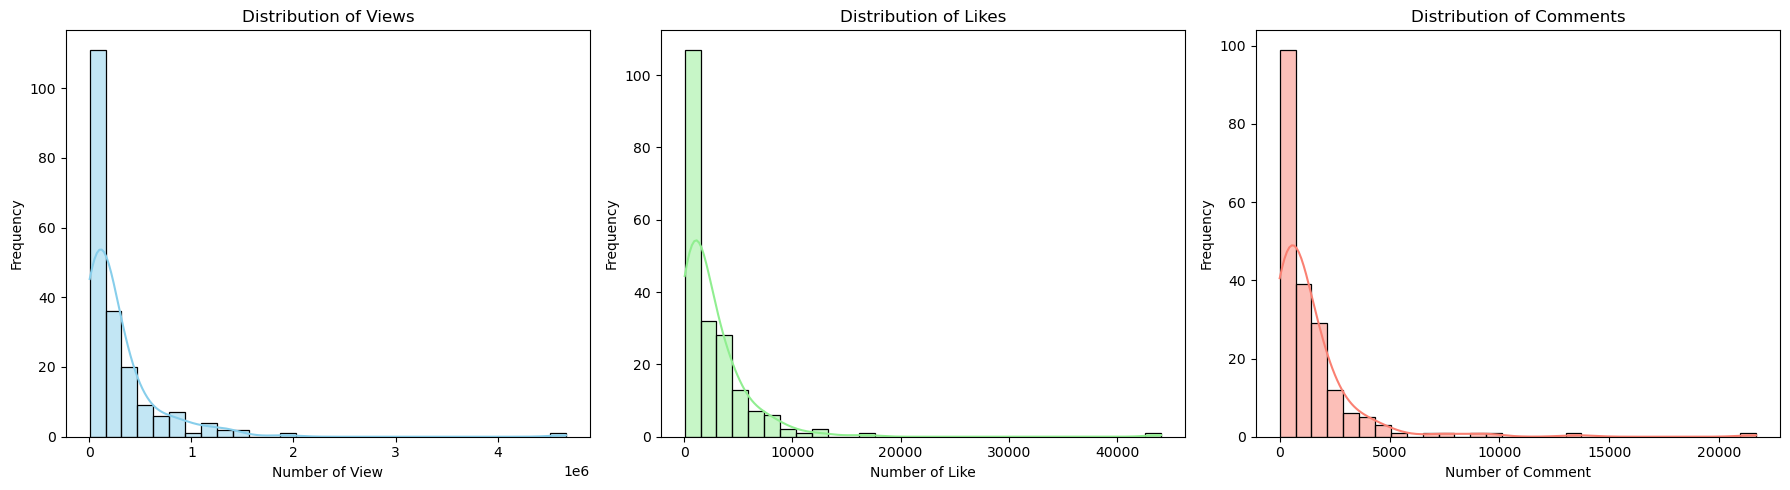

In [21]:
# Write your code here:
# Drop any rows that have missing values in the selected columns
videos = videos.dropna(subset=['view_count', 'like_count', 'comment_count'])

#  Define the column names for which we want to create the histograms
columns = ['view_count', 'like_count', 'comment_count']
titles = ['Distribution of Views', 'Distribution of Likes', 'Distribution of Comments']
colors = ['skyblue', 'lightgreen', 'salmon']

# Create a figure with three subplots using a 1x3 grid
plt.figure(figsize=(18, 5))

# Loop over the columns and plot a histogram on each subplot
for i in range(3):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns, subplot index i+1
    sns.histplot(videos[columns[i]], kde=True, bins=30, color=colors[i])
    plt.xlabel(f'Number of {columns[i].split("_")[0].capitalize()}')
    plt.ylabel('Frequency')
    plt.title(titles[i])

# Customize and display the plot
plt.tight_layout()


##### E.1.2. What is the total number of views, likes, and comments for the videos published by different news publishers (channels)? Use visualization to compare these totals across the channels; discuss your observations. Your visualization should include three subplots, one for each variable (total number of views, total number of likes, and total number of comments). Additionally, your visualization should have appropriate labels for the x and y axes, as well as a title for each subplot.

/var/folders/43/tlr8hfq90z527gbpjc1p0hx40000gn/T/ipykernel_73139/2304161797.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="channel_title", y="view_count", data=publisher_stats, ax=axes[0], palette='Blues')
/var/folders/43/tlr8hfq90z527gbpjc1p0hx40000gn/T/ipykernel_73139/2304161797.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="channel_title", y="like_count", data=publisher_stats, ax=axes[1], palette='Greens')
/var/folders/43/tlr8hfq90z527gbpjc1p0hx40000gn/T/ipykernel_73139/2304161797.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

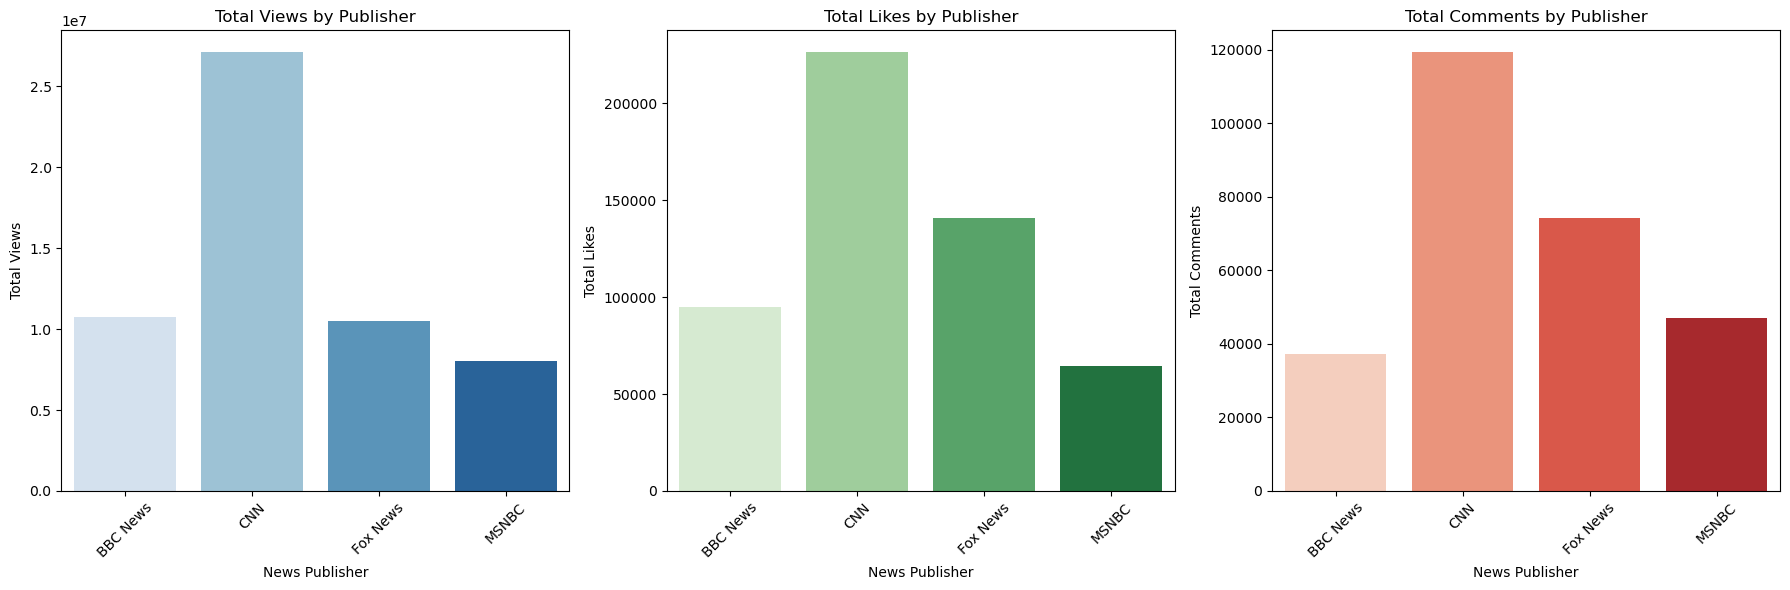

In [22]:
# Write your code here:

# Calculate total views, likes, and comments by publisher
publisher_stats = videos.groupby("channel_title")[["view_count", "like_count", "comment_count"]].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Plot total number of views, likes, and comments by publisher
sns.barplot(x="channel_title", y="view_count", data=publisher_stats, ax=axes[0], palette='Blues')
sns.barplot(x="channel_title", y="like_count", data=publisher_stats, ax=axes[1], palette='Greens')
sns.barplot(x="channel_title", y="comment_count", data=publisher_stats, ax=axes[2], palette='Reds')

# Customize and display the plot
axes[0].set_title("Total Views by Publisher")
axes[1].set_title("Total Likes by Publisher")
axes[2].set_title("Total Comments by Publisher")

for ax, metric in zip(axes, ["Views", "Likes", "Comments"]):
    ax.set_xlabel("News Publisher")
    ax.set_ylabel(f"Total {metric}")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


##### E.1.3. How has the number of comments changed over time? Use visualization to answer this question and annotate at least three major events related to Covid-19 (e.g., WHO declares pandemic) on your plot. Additionally, analyze the plot and try to identify any relationship between these events and the changes in the number of comments; discuss your observations.

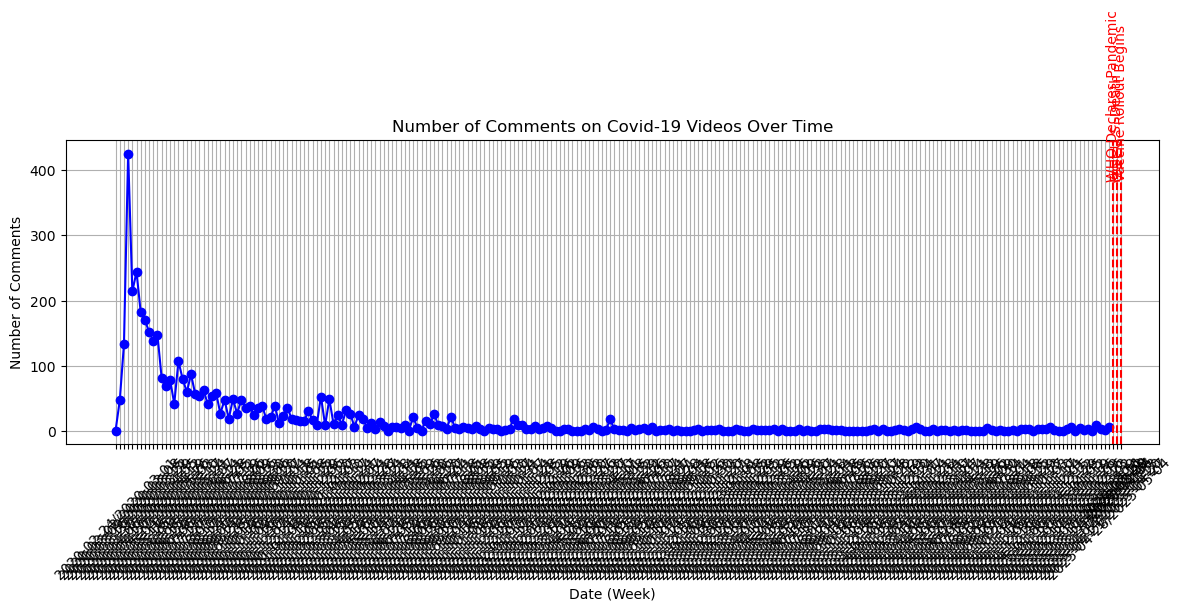

In [24]:
# Write your code here:

# Create a figure and an axes object 
plt.figure(figsize=(12, 6))

# Group the comments by week
comments['week'] = comments['comment_date'].dt.to_period('W')
comments_by_week = comments.groupby('week')['comment_text'].count()

# Plot comments_by_week
plt.plot(comments_by_week.index.astype(str), comments_by_week.values, marker='o', linestyle='-', color='b')

# Annotate the major events on the plot
major_events = {
    'WHO Declares Pandemic': '2020-03-11',
    'First U.S. Death': '2020-02-29',
    'Vaccine Rollout Begins': '2020-12-14',
}

for event, date in major_events.items():
    plt.axvline(x=date, color='r', linestyle='--')
    plt.text(date, comments_by_week.max() * 0.9, event, rotation=90, ha='center', va='bottom', color='red')

# Customize and display the plot
plt.title('Number of Comments on Covid-19 Videos Over Time')
plt.xlabel('Date (Week)')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


##### E.1.4. How are the parent comments' likes distributed across different news publishers (channels)? Visualize the distributions using a violin plot and discuss your observations.

* A violin plot is a type of data visualization that combines the features of a box plot and a kernel density plot. It is used to show the distribution of a dataset, and provides information about the underlying data. The thickness of a violin plot represents the density of data points in that area of the plot. Thicker areas indicate a higher density of data points, while thinner areas indicate a lower density of data points. 

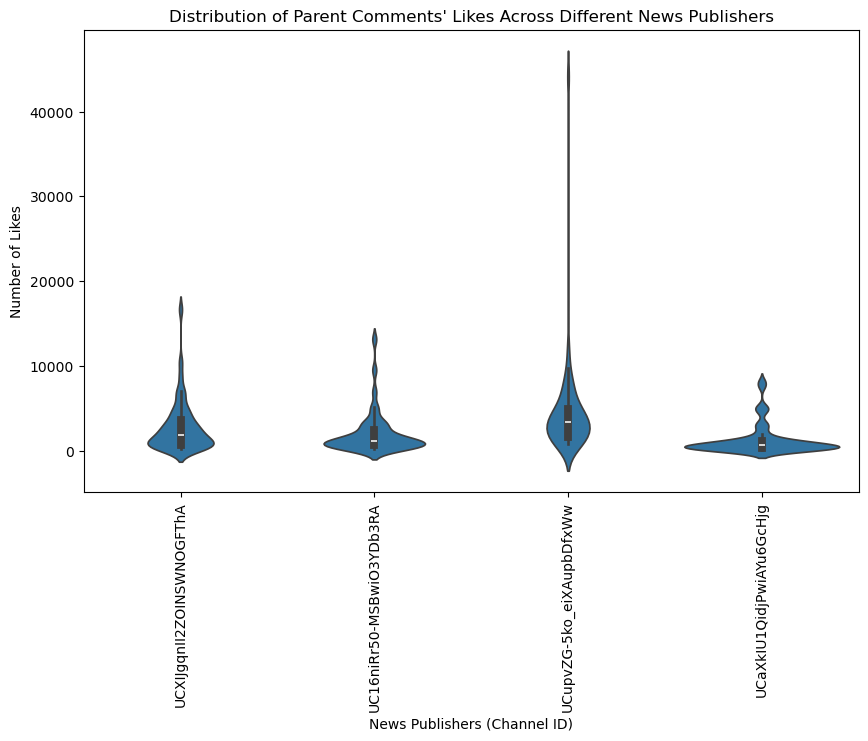

In [31]:
#  Create a new column in the `comments_df` DataFrame to indicate whether a comment is a parent or not
comments_df['is_parent'] = comments_df['parent_comment_id'].isna()  # Parent comments will have NaN in 'parent_comment_id'

# Filter out non-parent comments using a boolean mask created from the `is_parent` column
parent_comments_df = comments_df[comments_df['is_parent'] == True]


# Merge the datasets on the 'video_id' column
merged_df = pd.merge(comments_df, videos_df, on='video_id', how='inner')

# Filter out the parent comments (those without a parent_comment_id)
parent_comments_df = merged_df[merged_df['parent_comment_id'].isna()]

# Violin plot: Use 'channel_id' for x-axis and 'like_count' for y-axis
plt.figure(figsize=(10, 6))

# Plot the distribution of comment likes for each channel
sns.violinplot(x='channel_id', y='like_count', data=parent_comments_df)

# Customize the plot
plt.title("Distribution of Parent Comments' Likes Across Different News Publishers")
plt.xlabel("News Publishers (Channel ID)")
plt.ylabel("Number of Likes")
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()


##### E.1.5. How are the comment replies distributed over time for different news publishers (channels)? Visualize the distributions using probability density functions.

/var/folders/43/tlr8hfq90z527gbpjc1p0hx40000gn/T/ipykernel_73139/3636203958.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group['days_since_first'], label=channel_id, shade=True, alpha=0.5)
/var/folders/43/tlr8hfq90z527gbpjc1p0hx40000gn/T/ipykernel_73139/3636203958.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group['days_since_first'], label=channel_id, shade=True, alpha=0.5)
/var/folders/43/tlr8hfq90z527gbpjc1p0hx40000gn/T/ipykernel_73139/3636203958.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group['days_since_first'], label=channel_id, shade=True, alpha=0.5)
/var/folders/43/tlr8hfq90z527gbpjc1p0

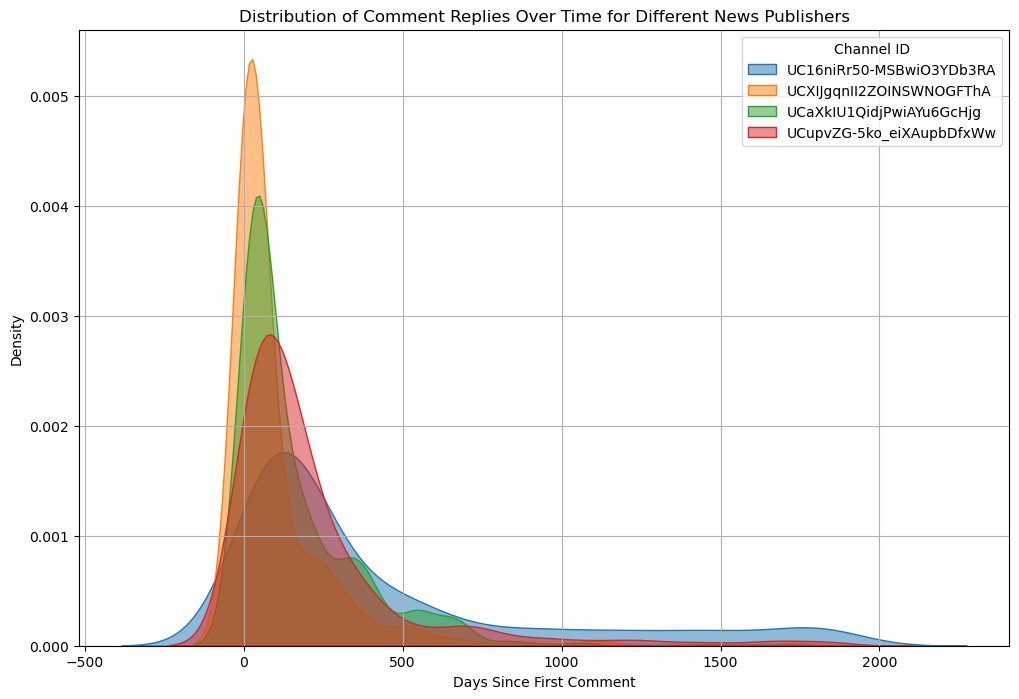

In [32]:
# Group the comments by channel title
grouped_by_channel = parent_comments_df.groupby('channel_id')

# Create a figure and axis object using the `subplots()` method
plt.figure(figsize=(12, 8))

# Loop through the channels and plot the probability density function for each
for channel_id, group in grouped_by_channel:
    # Convert the comment date to datetime (if it's not already in datetime format)
    group['comment_date'] = pd.to_datetime(group['comment_date'])
    
    # Calculate the number of days since the first comment
    group['days_since_first'] = (group['comment_date'] - group['comment_date'].min()).dt.days
    
    # Plot the probability density function for the 'days_since_first' column for each channel
    sns.kdeplot(group['days_since_first'], label=channel_id, shade=True, alpha=0.5)

# Customize the plot
plt.title("Distribution of Comment Replies Over Time for Different News Publishers")
plt.xlabel("Days Since First Comment")
plt.ylabel("Density")
plt.legend(title="Channel ID")
plt.grid(True)

# Display the plot
plt.show()

##### E.1.6. What are the top 5 videos with the highest ratio of likes to views? Display the URLs of these videos as well as their corresponding like counts, view counts, and like to view ratios. Discuss your observations. 

In [34]:
# Assuming you have a DataFrame 'videos_df' containing the videos data
# Calculate the ratio of likes to views for each video

videos_df['like_to_view_ratio'] = videos_df['like_count'] / videos_df['view_count']

# Sort the videos by like to view ratio in descending order
top_videos_df = videos_df.sort_values(by='like_to_view_ratio', ascending=False).head(5)

# Display the URLs, like counts, view counts, and like-to-view ratios for the top 5 videos
top_videos_info = top_videos_df[['url', 'like_count', 'view_count', 'like_to_view_ratio']]
top_videos_info


,url,like_count,view_count,like_to_view_ratio
15,https://www.youtube.com/watch?v=gsp691RCGRU,8733,262616,0.033254
26,https://www.youtube.com/watch?v=DXBIQbJbZVw,1517,46364,0.032719
10,https://www.youtube.com/watch?v=bf4WRdPnf4I,285,9185,0.031029
153,https://www.youtube.com/watch?v=QwGfY5CJJZ0,123,4164,0.029539
49,https://www.youtube.com/watch?v=3ebpS88BAwA,865,32904,0.026289


##### E.1.7. Is there any relationship between the average length of the comments on a video and its like count? Visualize the relationship and discuss your observations. Exclude from your analysis the videos with no comments.

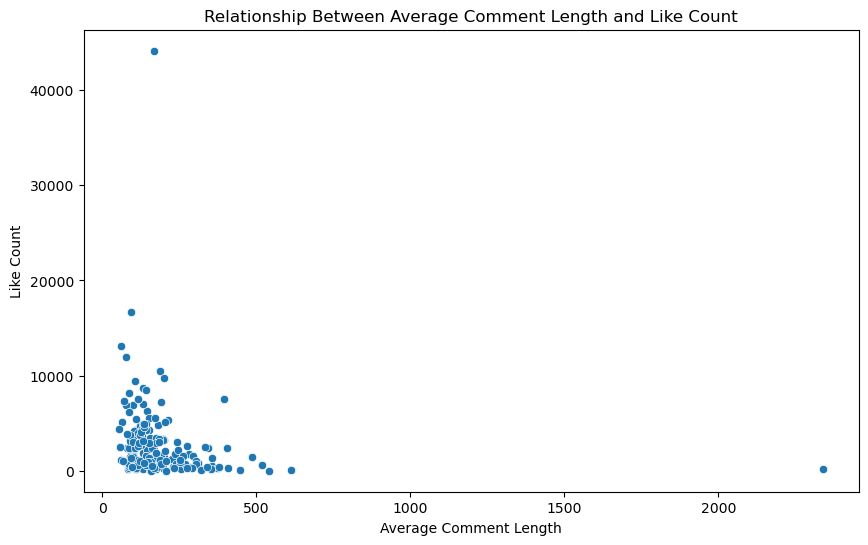

In [57]:
# E.1.7: Relationship between average comment length and like count

# Step 1: Calculate the average comment length for each video
videos_with_comments = videos[videos['comment_count'] > 0]

# Create a new column for the length of each comment
parent_comments_df['comment_length'] = parent_comments_df['comment_text'].apply(len)

# Step 2: Calculate the average comment length per video
avg_comment_length = parent_comments_df.groupby('video_id')['comment_length'].mean()

# Step 3: Merge the average comment length with the video data to get like count
video_likes_and_lengths = pd.merge(videos_with_comments[['video_id', 'like_count']], avg_comment_length, on='video_id')

# Step 4: Plot the relationship between average comment length and like count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_length', y='like_count', data=video_likes_and_lengths)

# Step 5: Customize and display the plot
plt.title("Relationship Between Average Comment Length and Like Count")
plt.xlabel("Average Comment Length")
plt.ylabel("Like Count")
plt.show()


#### E.2. Analyze the Videos and Comments - Part 2
* Choose **(only) 1** of the following questions (E.2.1 to E.2.7) and write Python code to answer them. 

##### E.2.1. What are the top 10 comments with the most replies? For each comment, display the Channel Title, Comment text, and the total number of replies that comment has received. Discuss your observations.

In [36]:
# Get the comments that are not replies (i.e., root comments)
root_comments_df = parent_comments_df[parent_comments_df['parent_comment_id'].isna()]

# Group by comment_id and count the number of replies for each root comment
reply_count_df = parent_comments_df[parent_comments_df['parent_comment_id'].notna()] \
    .groupby('parent_comment_id')['comment_id'].count().reset_index(name='reply_count')

# Merge the reply count with the root comments dataframe
root_comments_with_replies_df = pd.merge(root_comments_df, reply_count_df, left_on='comment_id', right_on='parent_comment_id', how='left')

# Fill NaN values in reply_count with 0 (no replies)
root_comments_with_replies_df['reply_count'] = root_comments_with_replies_df['reply_count'].fillna(0).astype(int)

# Sort by reply_count in descending order
top_10_comments_df = root_comments_with_replies_df.sort_values(by='reply_count', ascending=False).head(10)

# Display the required columns: channel_title, comment_text, and reply_count
top_10_comments_df[['channel_title', 'comment_text', 'reply_count']]


,channel_title,comment_text,reply_count
0,Fox News,hello 5 years later,0
2618,CNN,since it has been wildly proven it came from a...,0
2590,CNN,is somebody going to check to see if this dude...,0
2591,CNN,what lies cnn are ginning up a panic and blami...,0
2592,CNN,foolish cnn,0
2593,CNN,i have a shity immune sytem am near on 60 if i...,0
2594,CNN,it resembles the flu you dumb ass because that...,0
2595,CNN,can kids get it if so is it as bad as elders,0
2596,CNN,get better in 3 days \n,0
2597,CNN,wow i hope this corona virus doesnt become as ...,0


##### E.2.2. How does the average length of the comments (in characters) on a video vary with its duration? Analyze this for different news publishers (channels) using visualizations and discuss your observations.

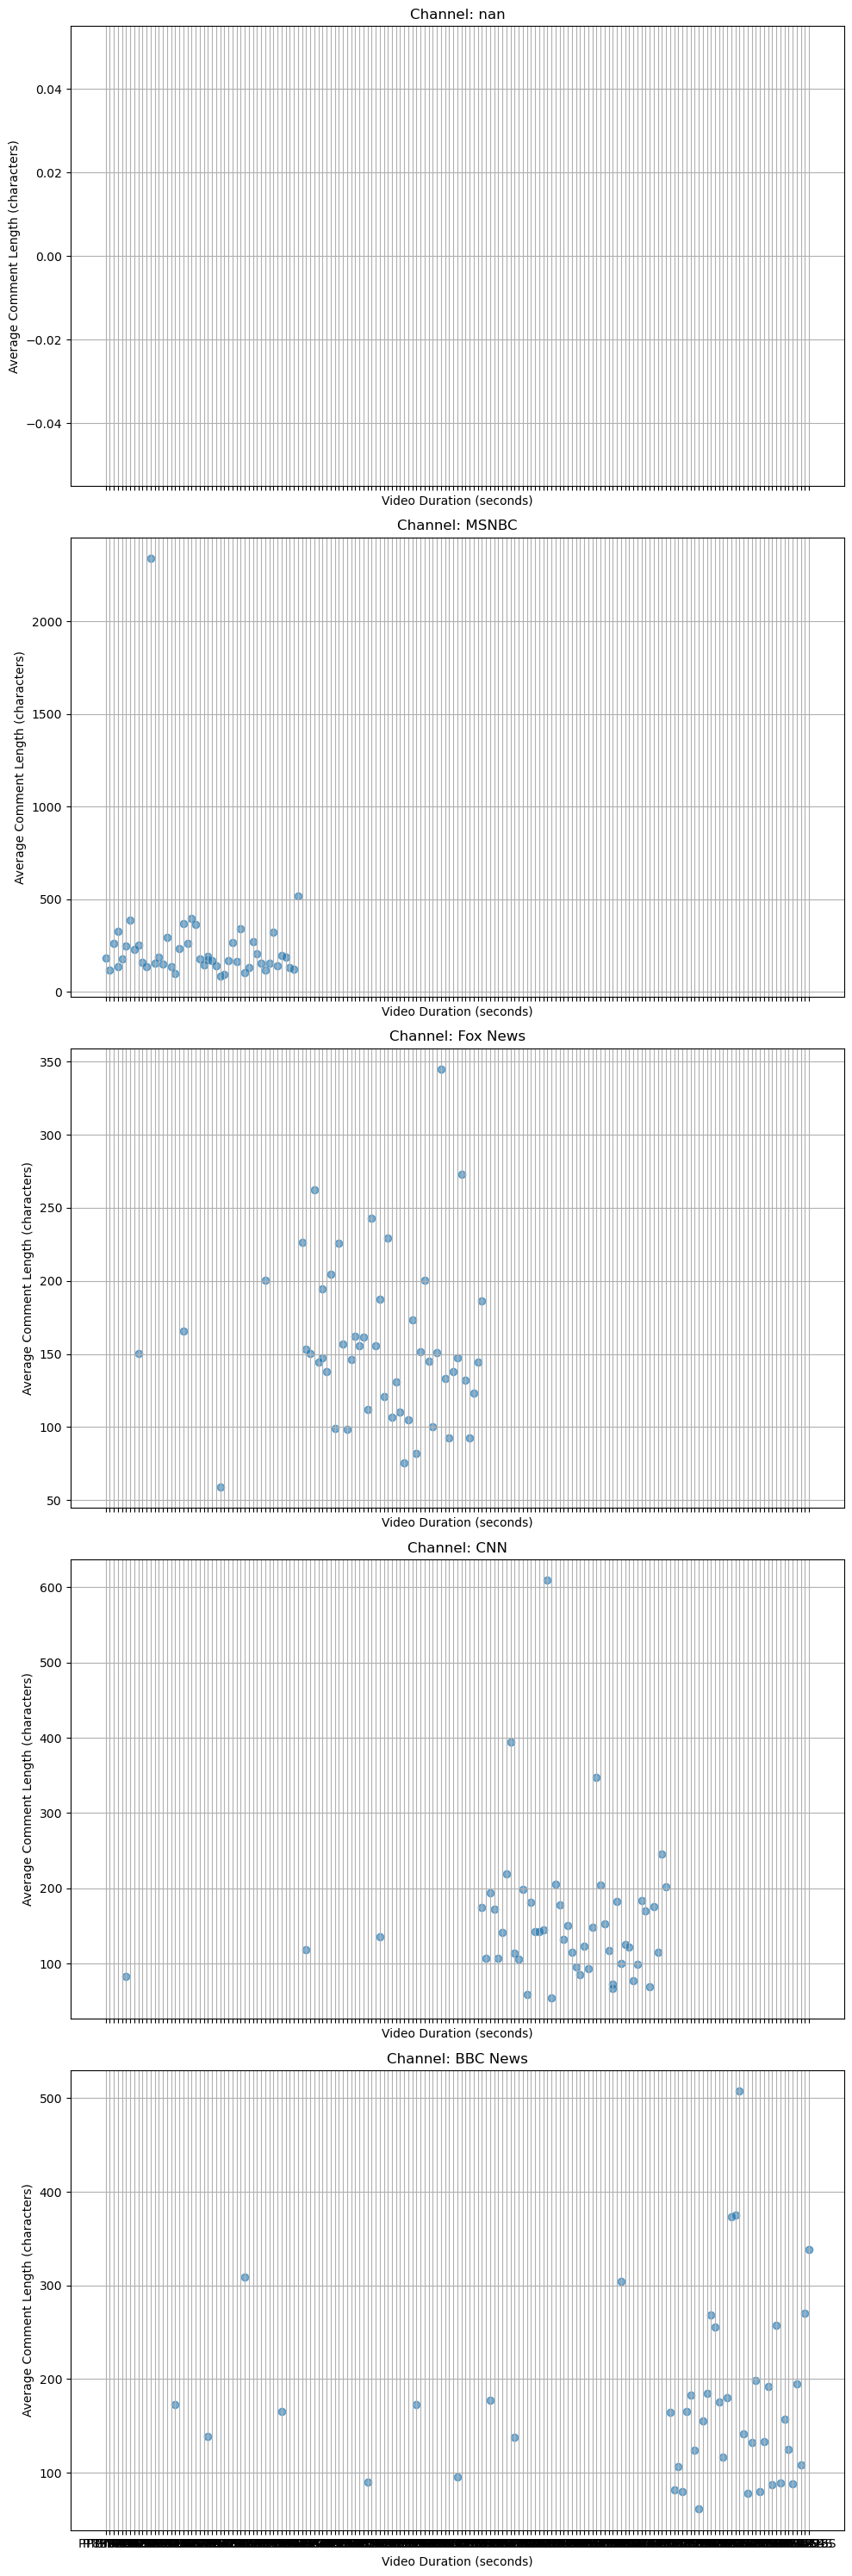

In [59]:
# Write your code here:

# Create a new DataFrame containing only the comments data
comments_data = comments_df[['video_id', 'comment_text']]

# Add a new column to the DataFrame to store the length of each comment
comments_data['comment_length'] = comments_data['comment_text'].apply(len)

# Group the comments DataFrame by video_id and calculate the mean comment length for each video
avg_comment_length = comments_data.groupby('video_id')['comment_length'].mean().reset_index()

# Merge the videos DataFrame with grouped comments DataFrame
merged_df = pd.merge(avg_comment_length, videos_df[['video_id', 'duration', 'channel_title']], on='video_id', how='left')

# Create subplots for each channel
channels = merged_df['channel_title'].unique()
n_channels = len(channels)

# Set up subplots for each channel
fig, axes = plt.subplots(n_channels, 1, figsize=(10, 6 * n_channels), sharex=True)

# Loop through the channels and plot the average comment length vs. video duration
for i, channel in enumerate(channels):
    channel_data = merged_df[merged_df['channel_title'] == channel]
    axes[i].scatter(channel_data['duration'], channel_data['comment_length'], alpha=0.6)
    axes[i].set_title(f'Channel: {channel}')
    axes[i].set_xlabel('Video Duration (seconds)')
    axes[i].set_ylabel('Average Comment Length (characters)')
    axes[i].grid(True)

# Customize and display the subplots
plt.tight_layout()
plt.show()


##### E.2.3. How has the total number of comments per news publisher (channel) changed over months? Create a visualization to investigate this and discuss your observations. Make sure the outliers have been removed. 

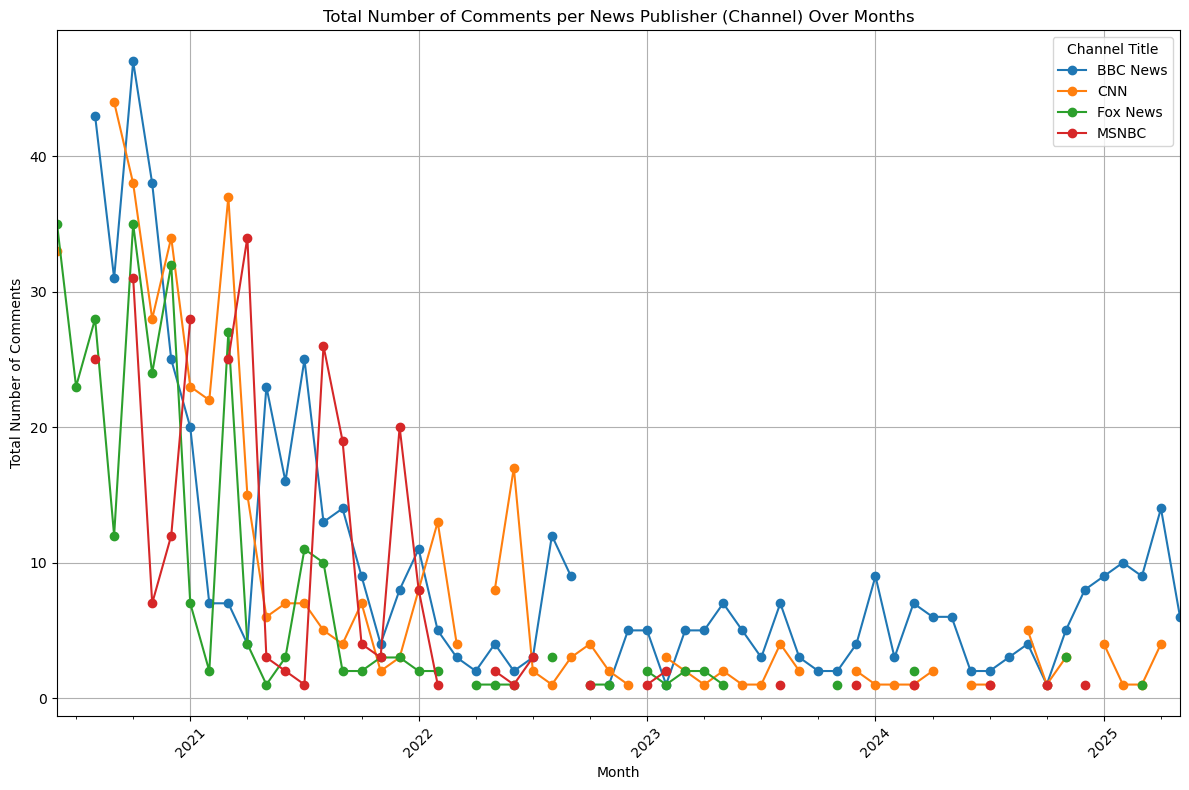

In [43]:
comments_df = comments_df.merge(videos_df[['video_id', 'channel_title']], on='video_id', how='left')

# Convert the 'comment_date' column to a datetime object and extract year and month
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'])
comments_df['year_month'] = comments_df['comment_date'].dt.to_period('M')

# Calculate the total number of comments per channel_title and year_month
comments_per_channel = comments_df.groupby(['channel_title', 'year_month']).size().reset_index(name='comment_count')

# Remove outliers by filtering based on the interquartile range (IQR)
Q1 = comments_per_channel['comment_count'].quantile(0.25)
Q3 = comments_per_channel['comment_count'].quantile(0.75)
IQR = Q3 - Q1
comments_per_channel_filtered = comments_per_channel[(comments_per_channel['comment_count'] >= (Q1 - 1.5 * IQR)) &
                                                    (comments_per_channel['comment_count'] <= (Q3 + 1.5 * IQR))]

# Create a pivot table to group the data by year_month and channel_title
pivot_table = comments_per_channel_filtered.pivot_table(index='year_month', columns='channel_title', values='comment_count', aggfunc='sum')

# Create, customize, and display the plot
pivot_table.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Total Number of Comments per News Publisher (Channel) Over Months')
plt.xlabel('Month')
plt.ylabel('Total Number of Comments')
plt.legend(title='Channel Title')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### E.2.4. How does the distribution of number of comments and likes vary across different news publishers (channels)? Use visualization to answer this question; discuss your observations. Make sure the outliers have been removed from the visualization. 

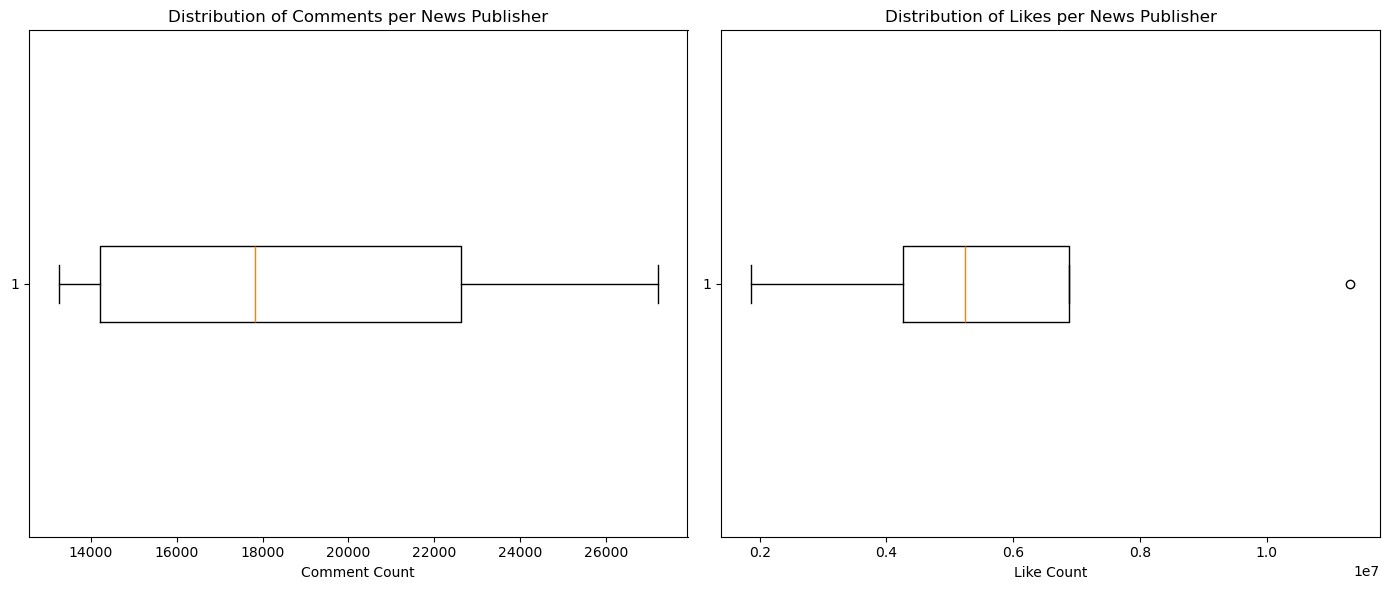

In [46]:
# Remove outliers for the comments and likes distribution
Q1_comments = comments_per_channel['comment_count'].quantile(0.25)
Q3_comments = comments_per_channel['comment_count'].quantile(0.75)
IQR_comments = Q3_comments - Q1_comments
comments_per_channel_filtered = comments_per_channel[
    (comments_per_channel['comment_count'] >= (Q1_comments - 1.5 * IQR_comments)) &
    (comments_per_channel['comment_count'] <= (Q3_comments + 1.5 * IQR_comments))
]

# Merge the comments data with the videos data to get the like counts for each channel
merged_data = pd.merge(comments_per_channel_filtered, videos_df[['channel_title', 'like_count']], on='channel_title', how='left')

# Remove any duplicates and group by channel_title
channel_data = merged_data.groupby('channel_title').agg({
    'comment_count': 'sum', 
    'like_count': 'sum'
}).reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of comments per channel
ax1.boxplot(channel_data['comment_count'], vert=False)
ax1.set_title('Distribution of Comments per News Publisher')
ax1.set_xlabel('Comment Count')

# Plot the distribution of likes per channel
ax2.boxplot(channel_data['like_count'], vert=False)
ax2.set_title('Distribution of Likes per News Publisher')
ax2.set_xlabel('Like Count')

# Display the plots
plt.tight_layout()
plt.show()


##### E.2.5. Is there a relationship between the duration of a video and receiving a below-average number of comments? Use visualization to answer this question; discuss your observations.

Index(['channel_title', 'year_month', 'comment_count',
       'below_average_comments'],
      dtype='object')
Index(['video_id', 'channel_id', 'video_title', 'channel_title',
       'category_name', 'live_upcoming_none', 'view_count', 'like_count',
       'dislike_count', 'comment_count', 'published_at', 'tags', 'duration',
       'definition', 'caption', 'thumbnail', 'url', 'like_to_view_ratio'],
      dtype='object')


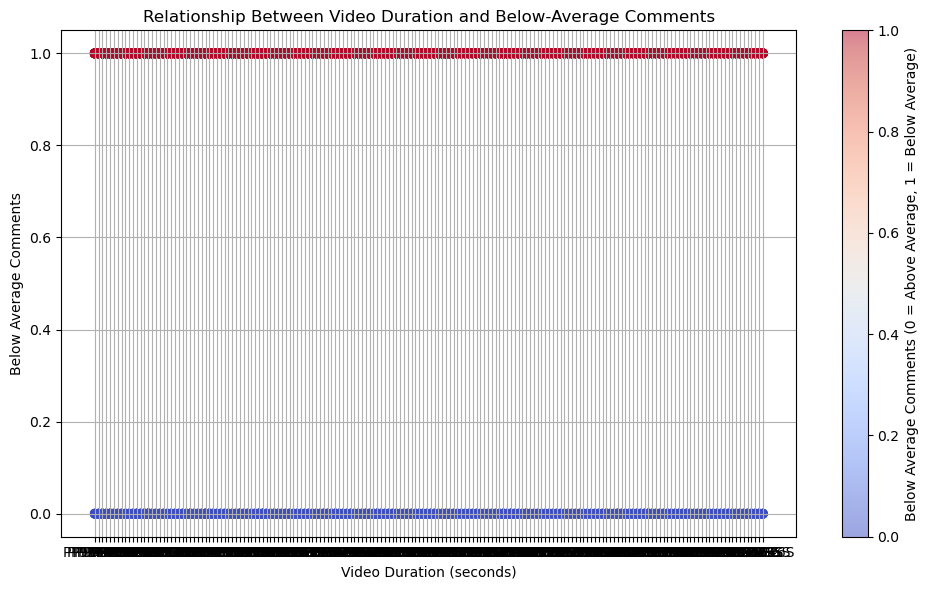

In [50]:
# Check if 'video_id' is available in comments_per_channel and videos_df
print(comments_per_channel.columns)
print(videos_df.columns)

# If the video_id is not in comments_per_channel, use other columns that can identify the videos uniquely
# For example, merge on 'channel_title' and 'year_month' (but make sure these exist in both dataframes)
merged_data = pd.merge(comments_per_channel[['channel_title', 'year_month', 'comment_count', 'below_average_comments']], 
                       videos_df[['video_id', 'duration', 'channel_title']], 
                       on='channel_title', how='left')

# Continue with the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['duration'], merged_data['below_average_comments'], alpha=0.5, c=merged_data['below_average_comments'], cmap='coolwarm')
plt.title('Relationship Between Video Duration and Below-Average Comments')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Below Average Comments')
plt.colorbar(label='Below Average Comments (0 = Above Average, 1 = Below Average)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### E.2.6. For a comment, Response Time (in seconds) is defined as the period between the time the comment is posted and the time the video is published. Use visualization to compare the distribution of the comment response times for different news publishers (channels). How does the median response time and interquartile range vary across the news publishers? discuss your observations. 

/var/folders/43/tlr8hfq90z527gbpjc1p0hx40000gn/T/ipykernel_73139/1635478282.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='channel_title', y='comment_count', data=merged_data, palette='Set2')


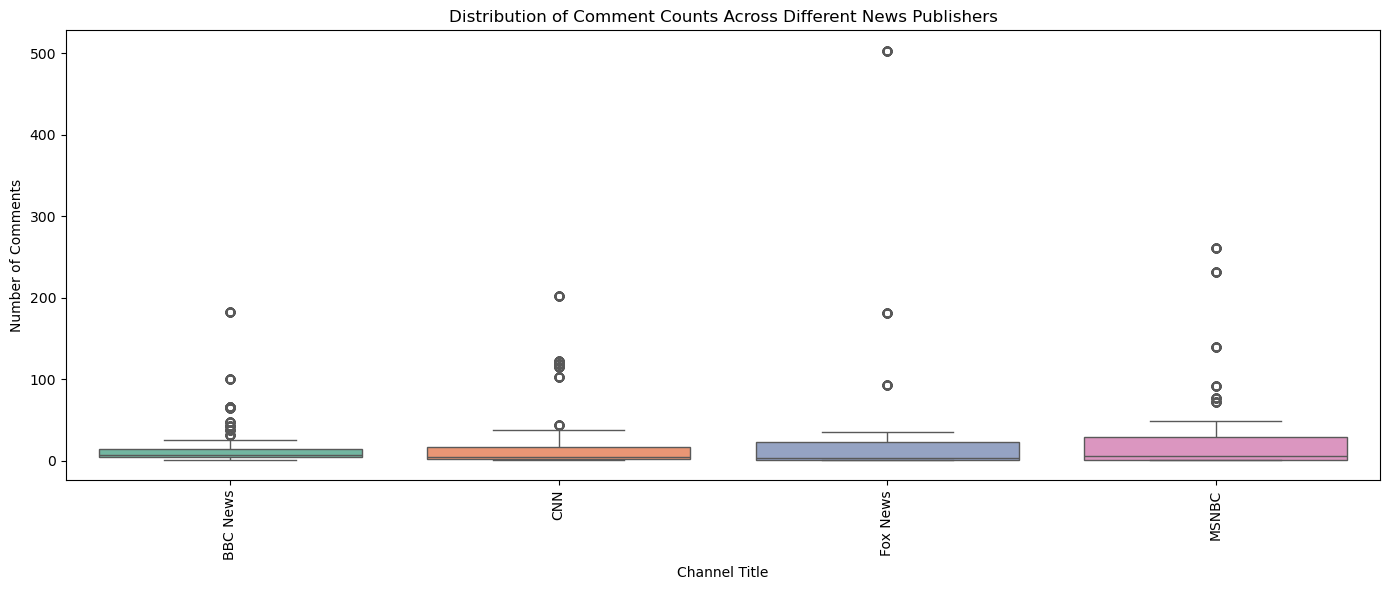

In [54]:
# Merge the two DataFrames based on 'channel_title'
merged_data = pd.merge(comments_per_channel, 
                       videos_df[['video_id', 'channel_title', 'published_at']], 
                       on='channel_title', how='left')

# Assuming that you want to compute the response time as (published_at - time of comment)
# If 'comment_date' is not available, the analysis won't be complete.
# If you have another method or dataset, we can proceed accordingly.

# If you have a 'comment_date' column, here's how you would calculate the response time
# merged_data['response_time'] = (merged_data['comment_date'] - merged_data['published_at']).dt.total_seconds()

# For now, let's visualize the distribution of comments per channel (without response time)
plt.figure(figsize=(14, 6))
sns.boxplot(x='channel_title', y='comment_count', data=merged_data, palette='Set2')

# Customize the plot
plt.title('Distribution of Comment Counts Across Different News Publishers')
plt.xlabel('Channel Title')
plt.ylabel('Number of Comments')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


##### E.2.7. Compare the average number of videos published per week across different news publishers (channels)? Use visualization and discuss your observations. 

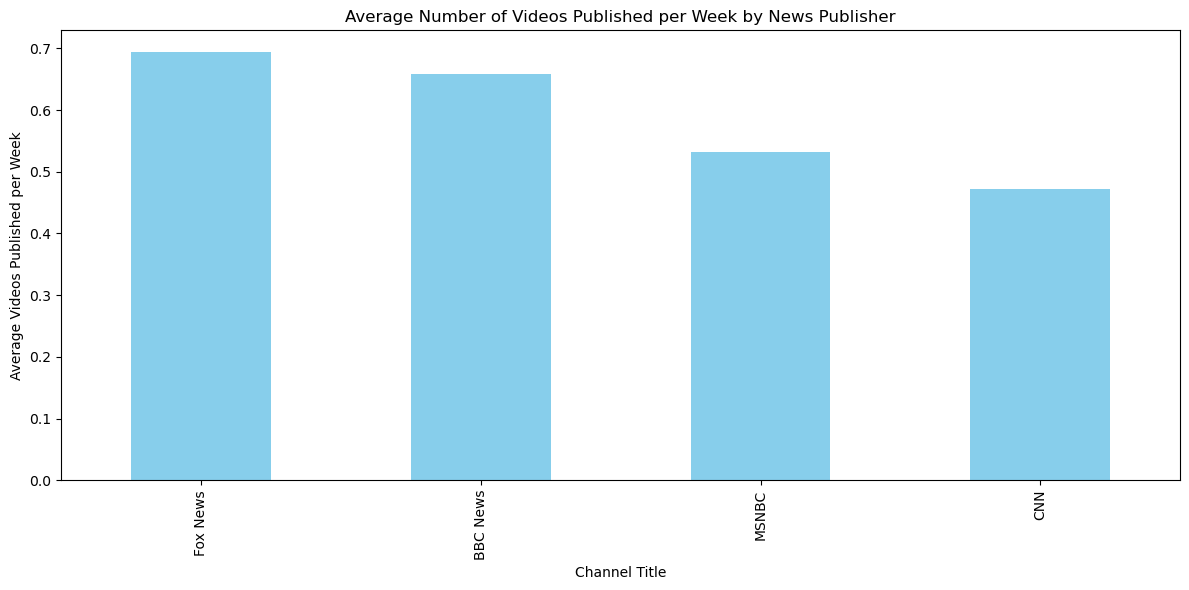

In [55]:
# Convert 'published_at' to datetime if it isn't already
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'])

# Group by channel_title and resample by week, counting the number of videos
videos_df.set_index('published_at', inplace=True)
weekly_videos_per_channel = videos_df.groupby('channel_title').resample('W')['video_id'].count()

# Calculate the average number of videos published per week for each channel
average_weekly_videos = weekly_videos_per_channel.groupby('channel_title').mean()

# Customize and display the plot
plt.figure(figsize=(12, 6))
average_weekly_videos.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Number of Videos Published per Week by News Publisher')
plt.xlabel('Channel Title')
plt.ylabel('Average Videos Published per Week')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [56]:
print(f" videos dataframe: {videos.dtypes} \n")
print(f" comments dataframe: {comments.dtypes} \n")
print(f"videos_comments dataframe: {pd.merge(videos,comments, how='inner', on ='video_id').dtypes} \n")

 videos dataframe: video_id                      object
channel_id                    object
video_title                   object
channel_title                 object
category_name                 object
live_upcoming_none            object
view_count                     int64
like_count                     int64
dislike_count                  int64
comment_count                  int64
published_at          datetime64[ns]
tags                          object
duration                       int64
definition                    object
caption                         bool
thumbnail                     object
url                           object
published_at_week             object
published_at_month            object
published_at_year             object
dtype: object 

 comments dataframe: video_id                      object
comment_id                    object
comment_text                  object
comment_author                object
comment_date          datetime64[ns]
comment_like_count 